In [13]:
import dataset as dt

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [10]:
df = dt.read_dataset()

In [18]:
dt.remove_duplicates(df, same_label=False, inplace=True)

,chromagram,rms,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,mfcc2,mfcc3,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,genre
1,0.350088,0.130228,1784.165850,2002.449060,3805.839606,0.083045,-113.570650,121.571790,-19.168142,42.366420,...,8.803792,-3.672300,5.747995,-5.162882,0.752740,-1.690215,-0.408979,-2.303523,1.221290,blues
2,0.340914,0.095948,1530.176679,2039.036516,3550.522098,0.056040,-207.501700,123.991264,8.955127,35.877647,...,5.376328,-2.231760,4.220140,-6.012148,0.927997,-0.731125,0.295073,-0.283518,0.531216,blues
3,0.363637,0.175570,1552.811865,1747.702312,3042.260232,0.076291,-90.722595,140.446300,-29.093890,31.684334,...,5.791199,-8.907628,-1.077000,-9.229274,2.451689,-7.729094,-1.816407,-3.439720,-2.231259,blues
4,0.404785,0.141093,1070.106615,1596.412872,2184.745799,0.033309,-199.544200,150.090900,5.662678,26.859080,...,6.079319,-2.480174,-1.079305,-2.870789,0.780873,-3.319596,0.636965,-0.619121,-3.407449,blues
5,0.308526,0.091529,1835.004266,1748.172116,3579.757627,0.101461,-160.337700,126.219635,-35.587810,22.148071,...,-2.813867,-6.933385,-7.552725,-9.164666,-4.520575,-5.454034,-0.916874,-4.404826,-11.703234,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.352063,0.079486,2008.149458,2106.541053,4253.557033,0.089227,-153.640960,109.864650,-23.065697,59.050125,...,12.348828,-12.297895,5.777902,-10.273881,1.789867,-13.289984,2.484145,-6.713265,-1.193787,rock
997,0.398687,0.076458,2006.843354,2068.942009,4149.338328,0.097664,-142.392030,116.189630,-32.147167,49.117840,...,14.080058,-16.392994,4.154395,-4.364872,3.739020,-10.848310,1.881228,-7.461491,-2.795339,rock
998,0.432142,0.081651,2077.526598,1927.293153,4031.405321,0.121823,-124.952270,115.177155,-47.975150,52.814674,...,10.474113,-17.947060,1.212127,-11.519417,1.838090,-12.845291,3.440978,-12.588070,-2.106337,rock
999,0.362485,0.083860,1398.699344,1818.450280,3015.631004,0.048724,-225.007750,123.646770,-9.724175,56.605164,...,7.682845,-10.070732,-0.256386,-5.275369,-2.812177,-4.416050,1.556207,-5.041897,-3.590644,rock


In [16]:
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 1 to 1000
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chromagram  985 non-null    float64
 1   rms         985 non-null    float64
 2   spec_cent   985 non-null    float64
 3   spec_bw     985 non-null    float64
 4   rolloff     985 non-null    float64
 5   zcr         985 non-null    float64
 6   mfcc0       985 non-null    float64
 7   mfcc1       985 non-null    float64
 8   mfcc2       985 non-null    float64
 9   mfcc3       985 non-null    float64
 10  mfcc4       985 non-null    float64
 11  mfcc5       985 non-null    float64
 12  mfcc6       985 non-null    float64
 13  mfcc7       985 non-null    float64
 14  mfcc8       985 non-null    float64
 15  mfcc9       985 non-null    float64
 16  mfcc10      985 non-null    float64
 17  mfcc11      985 non-null    float64
 18  mfcc12      985 non-null    float64
 19  mfcc13      985 non-null    

In [ ]:
df.info()

In [29]:
df.describe()

,chromagram,rms,spec_cent,spec_bw,rolloff,zcr,mfcc0,mfcc1,mfcc2,mfcc3,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,0.377708,0.130671,2194.401419,2239.708783,4558.766613,0.103015,-145.378464,99.808780,-8.718530,36.237968,...,-5.969660,4.411762,-4.709354,1.762939,-3.853678,1.104780,-3.930262,0.472011,-2.287044,-1.111019
std,0.081853,0.065751,716.934563,527.245199,1578.032119,0.041718,100.622471,31.424699,21.495328,16.658342,...,6.787031,6.724065,6.075290,5.018819,4.871486,4.568452,4.541486,3.870506,3.716703,3.846866
min,0.171939,0.005276,570.040355,898.066208,749.140636,0.021697,-552.120060,-1.461542,-89.870190,-18.727547,...,-28.057500,-15.796446,-27.523129,-12.594489,-17.539125,-15.693846,-17.234728,-11.963694,-18.501951,-19.929634
25%,0.319164,0.086464,1615.937513,1899.187435,3362.185676,0.069800,-202.057280,76.779915,-23.832516,24.121643,...,-10.809752,-0.580041,-9.255790,-1.664248,-7.108643,-1.875382,-7.139070,-2.041274,-4.604126,-3.385913
50%,0.380838,0.122255,2192.650290,2218.677679,4615.982658,0.098955,-121.142204,98.660760,-10.658145,36.827713,...,-5.889205,3.844509,-4.127179,1.878811,-3.579356,1.172113,-4.040711,0.650341,-2.384082,-1.193787
75%,0.434649,0.175337,2685.529888,2576.465396,5534.641062,0.130993,-74.055140,120.293580,5.613574,47.978218,...,-1.026100,9.580199,-0.154442,5.135507,-0.312532,4.301453,-0.832116,3.067543,0.177266,1.297605
max,0.663685,0.397973,4435.243901,3509.646417,8677.672688,0.274631,42.039433,193.097400,56.682800,80.702300,...,17.421560,23.034859,13.051313,18.176504,12.356001,13.457150,11.482946,15.388390,14.694926,15.369627


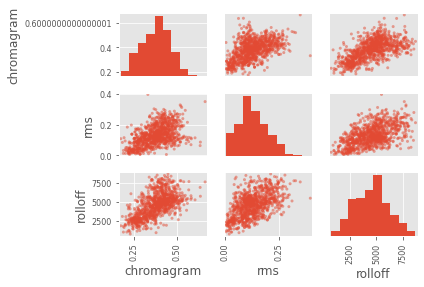

In [22]:
pd.plotting.scatter_matrix(df[['chromagram', 'rms', 'rolloff']])
plt.tight_layout();

In [28]:
genre_count = df.groupby('genre').count().sort_values()
print(genre_count)

TypeError: sort_values() missing 1 required positional argument: 'by'